In [7]:
import pandas as pd

df = pd.read_csv('../data/flights_with_weather_and_articles.csv')

In [8]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-large-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
df[df['articles'].apply(lambda x: len(x) == 0)]

,fl_date,dep_time,origin,dest,distance,weather_delay,datetime,datetimeEpoch,temp,feelslike,...,conditions,icon,stations,source,query,articles,month,day,hours,minutes


In [12]:
import ast
articles = ast.literal_eval(df['articles'].iloc[3])

In [13]:
entities = []
for article in articles:
    nlp(articles)

In [16]:
res = nlp(articles[0])


News
##N
##Y
##C
Ramsey
K
##hali
##fe
##h
New
York
Public
Radio
Catalina
Gone
##lla
Gotham
##ist
Ramsey
K
##hali
##fe
##h
Gotham
##ist
Gotham
##ist
New
York
City
Flight
##A
##ware
Newark
Liberty
La
##G
##uard
##ia
J
##F
##K
Flight
##A
##ware
Newark
Liberty
La
##G
##uard
##ia
J
##F
##K
National
Weather
Service
United
Flight
##A
##ware
Federal
Aviation
Administration
La
##G
##uard
##ia
US
Department
of
Transportation
La
##G
##uard
##ia
Newark
Liberty
Newark
US
La
##uard
##ia
Newark
La
##ia
U
US
US
##ware


In [17]:
import re
re.search('flight', articles[0])

<re.Match object; span=(43, 49), match='flight'>

In [18]:
articles[0]

'NewsNYC airports cancel, delay hundreds of flights during third day of stormsBy Ramsey KhalifehPublished Jun 27, 2023Modified Jun 27, 2023ShareFacebookTwitterRedditEmailNever miss a story\xa0Email address By submitting your information, you\'re agreeing to receive communications from New York Public Radio in accordance with our  Terms . \xa0Catalina Gonella/GothamistBy Ramsey KhalifehPublished Jun 27, 2023Modified Jun 27, 2023ShareFacebookTwitterRedditEmailWe rely on your support to make local news available to all Make your contribution now and help Gothamist thrive in 2024.  Donate today Gothamist is funded by sponsors and member donationsFor the third consecutive day, New York City’s three major airport hubs are experiencing the nation’s highest numbers of flight cancellations and delays, according to FlightAware data.As of Tuesday morning, Newark Liberty experienced more than 300 cancellations and 96 delays; LaGuardia had more than 120 cancellations and 67 delays; and JFK had more

In [19]:
prompt = f'''{articles[0]}

Instructions: Analyze the provided text to identify and extract key information related to flight delays. Focus on specific details such as airport names, number of flight cancellations and delays, reasons for delays, average delay durations, affected airlines, and any other relevant data. Summarize this information in a structured dictionary format with the following keys: Airport Names, Number of Cancellations, Number of Delays, Delay Reasons, Average Delay Duration, Affected Airlines, Additional Notes. Ensure accuracy and relevance in the extracted information.

Extracted Entities:'''


In [21]:
nlp(prompt)

[{'entity': 'B-ORG',
  'score': 0.9980667,
  'index': 1,
  'word': 'News',
  'start': 0,
  'end': 4},
 {'entity': 'I-ORG',
  'score': 0.9882544,
  'index': 2,
  'word': '##N',
  'start': 4,
  'end': 5},
 {'entity': 'I-ORG',
  'score': 0.92645466,
  'index': 3,
  'word': '##Y',
  'start': 5,
  'end': 6},
 {'entity': 'I-ORG',
  'score': 0.9890605,
  'index': 4,
  'word': '##C',
  'start': 6,
  'end': 7},
 {'entity': 'B-PER',
  'score': 0.9986376,
  'index': 19,
  'word': 'Ramsey',
  'start': 80,
  'end': 86},
 {'entity': 'I-PER',
  'score': 0.9890226,
  'index': 20,
  'word': 'K',
  'start': 87,
  'end': 88},
 {'entity': 'I-PER',
  'score': 0.95068234,
  'index': 21,
  'word': '##hali',
  'start': 88,
  'end': 92},
 {'entity': 'I-PER',
  'score': 0.8943181,
  'index': 22,
  'word': '##fe',
  'start': 92,
  'end': 94},
 {'entity': 'I-PER',
  'score': 0.8404696,
  'index': 23,
  'word': '##h',
  'start': 94,
  'end': 95},
 {'entity': 'B-ORG',
  'score': 0.9985209,
  'index': 75,
  'word': 

(array([ 0.,  0.,  0.,  0.,  0., 90.,  0.,  0.,  0.,  0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <BarContainer object of 10 artists>)

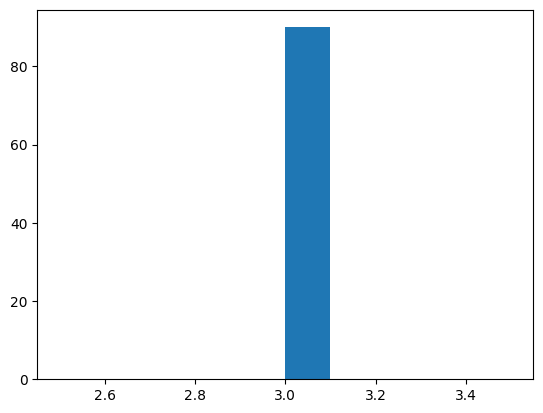

In [32]:
import matplotlib.pyplot as plt

plt.hist([len(ast.literal_eval(articles)) for articles in list(df['articles'])])

In [31]:
[len(ast.literal_eval(articles)) for articles in list(df['articles'])]

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [28]:
import ast

len(ast.literal_eval(df['articles'].iloc[0]))

3